# Customer Churn Prediction

# Business Problem

**Business issue is extremely straightforward, There is a bank who needs to hold their current clients who might churn, for that they need to realize which existing clients has the most elevated likelihood of churning of the bank account.**

# Data

**This data had been taken from Kaggle for the sole purpose of creating a machine learning model which predicts the churning of the customer**


**We have 10000 rows with 14 features and 1 target variable, Every row tells us different customer details and whether they churned or not after 2 months of observation.**

# Machine Learning

**So Converting a Business issue to a Machine Learning issue, This is by all accounts a straightforward binary classification problem in which we have 2 classes, "yes" and "no". We have a few numerical features and few categorical features.**

Importing all the required libraries.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import warnings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

Loading Csv File

In [113]:
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv")
df['Surname'].describe()

count     10000
unique     2932
top       Smith
freq         32
Name: Surname, dtype: object

In [27]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Understanding the data and manipulation

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [29]:
print(display(df))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


None


**Observation**
The data contains 10000 rows and 14 columns

In [14]:
print('Number of data points : ', df.shape[0])
print('Number of features : ', df.shape[1])
print('Features : ', df.columns.values)

Number of data points :  10000
Number of features :  14
Features :  ['RowNumber' 'CustomerId' 'Surname' 'CreditScore' 'Geography' 'Gender'
 'Age' 'Tenure' 'Balance' 'NumOfProducts' 'HasCrCard' 'IsActiveMember'
 'EstimatedSalary' 'Exited']


checking the missing values

In [15]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# observation

There are no null values in our data.

In [21]:
#checking the duplicates values
duplicate = df[df.duplicated()]
duplicate.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# Observation

No duplicate Values are found.

In [22]:
df['Exited'].value_counts() #getiing the number of values

0    7963
1    2037
Name: Exited, dtype: int64

**Observation**
No. of Customers who churned=2037
No. of customers who did not churned=7963

it is imbalanced data, we may need to do upsampling before training to balance our data

In [4]:
#df['Exited'].replace([1,0],['yes','no'])
df1=df.replace({"Exited":{1:"Yes",0:"No"}})

In [64]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


In [65]:
df1['Exited'].value_counts() #getiing the number of values

No     7963
Yes    2037
Name: Exited, dtype: int64

# Imbalanced Data

It seems that data is imbalanced, as number of "yes" is 2037 and number of "no" is 7963, we will balanced the data with upsampling

# Exploratory data analysis/ Data Visualization

This will include-

univariate analysis(histograms/bar plots/ pdf/cdf/box plots/violin plots) 

bivariate analysis(scatter plots and pair plots)

There are 14 features so we also need to see which features are not at all helping in classification. we surely know that customerID and row number is of no use

# Univariate Analysis

# Histograms

lets see variable one by one
**Geography**

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


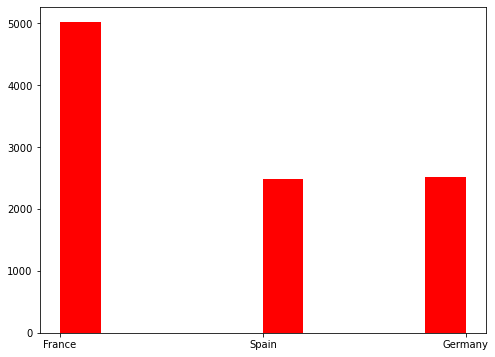

In [189]:
geography_count=df['Geography'].value_counts()
print(geography_count)

plt.figure(figsize=(8,6))
plt.hist(df['Geography'],facecolor='r')
plt.show()

**Observation**

1.We can say that highest number of people are from france

2.Number of people from spain and germany is almost same.

**Now lets see how geography is affecting our target variable "Exited"**

In [68]:
df[['Geography', 'Exited']].groupby('Geography').mean()

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


We can say that there is almost difference of 1000 between the number of males and females so it can be an important feature for our machine learning model.

**Gender**

Male      5457
Female    4543
Name: Gender, dtype: int64


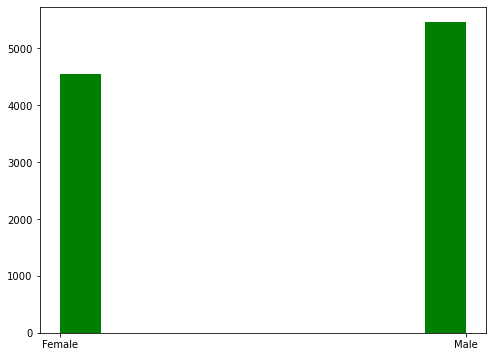

In [190]:
gender_count=df['Gender'].value_counts()
print(gender_count)

plt.figure(figsize=(8,6))
plt.hist(df['Gender'],facecolor='g')
plt.show()

**Observation**:

We can see that number of males is greater than that of number of females.

Now lets see how **Gender** is affecting our target variable **"Exited"**

In [46]:
df[['Gender', 'Exited']].groupby('Gender').mean()

,Exited
Gender,
Female,0.250715
Male,0.164559


**Observation**

There are differences in the mean of male and female. it can be used as an important feature to predict the churning.

**Age**

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64


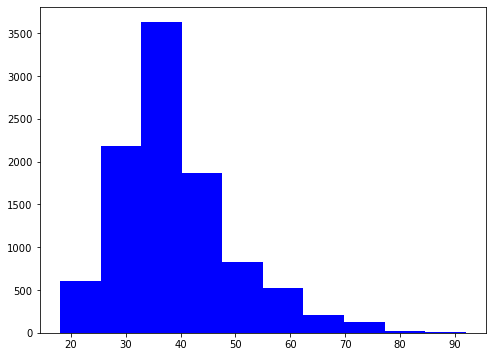

In [191]:
age_count=df['Age'].value_counts()
print(age_count)

plt.figure(figsize=(8,6))
plt.hist(df['Age'],facecolor='b')
plt.show()

Now lets see how **Age** is affecting our target variable **"Exited"**

In [4]:
df[['Age', 'Exited']].groupby('Exited').mean()

,Age
Exited,
0,37.408389
1,44.837997


**Observation**

1. We can see that majority of the customers are in between age of 25 to 55 years.

2.There are differences in the mean. it can be used as an important feature to predict the churning.

**Tenure**

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


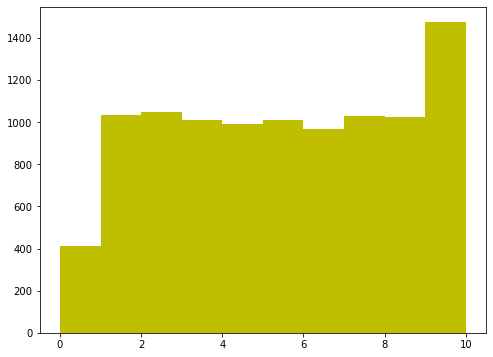

In [192]:
tenure_count=df['Tenure'].value_counts()
print(tenure_count)

plt.figure(figsize=(8,6))
plt.hist(df['Tenure'],facecolor='y')
plt.show()

Now lets see how **Tenure** is affecting our target variable **"Exited"**

In [10]:
df[['Tenure', 'Exited']].groupby('Exited').mean()

,Tenure
Exited,
0,5.033279
1,4.932744


**Observation**

1.There are differences in the mean. it can be used as an important feature to predict the churning.

**HasCrCard**

1    7055
0    2945
Name: HasCrCard, dtype: int64


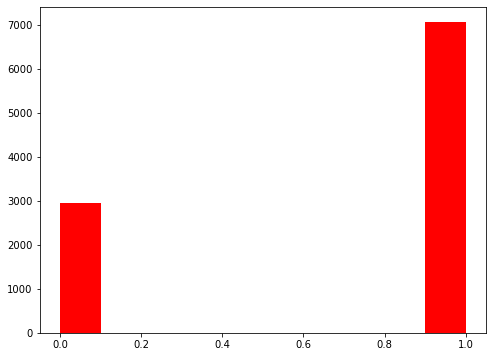

In [194]:
cr_count=df['HasCrCard'].value_counts()
print(cr_count)

plt.figure(figsize=(8,6))
plt.hist(df['HasCrCard'],facecolor='r')
plt.show()

Now lets see how **Tenure** is affecting our target variable **"Exited"**

In [5]:
df[['HasCrCard', 'Exited']].groupby('Exited').mean()

,HasCrCard
Exited,
0,0.707146
1,0.699067


**Observation**

1. We can say taht majority of people has credit card.
2.There are differences in the mean. it can be used as an important feature to predict the churning.

**Balance**

0.00         3617
105473.74       2
130170.82       2
72594.00        1
139723.90       1
             ... 
130306.49       1
92895.56        1
132005.77       1
166287.85       1
104001.38       1
Name: Balance, Length: 6382, dtype: int64


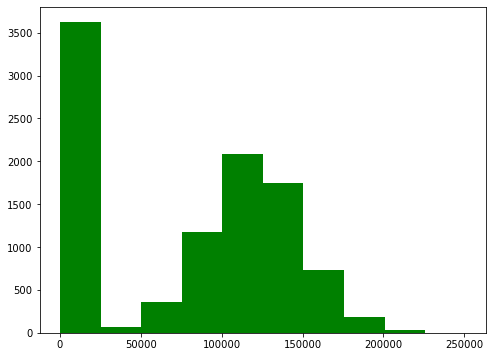

In [12]:
Balance_count=df['Balance'].value_counts()
print(Balance_count)

plt.figure(figsize=(8,6))
plt.hist(df['Balance'],facecolor='g')
plt.show()

Now lets see how **Balance** is affecting our target variable **"Exited"**

In [14]:
df[['Balance', 'Exited']].groupby('Exited').mean()

,Balance
Exited,
0,72745.296779
1,91108.539337


**NumOfProduct**

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


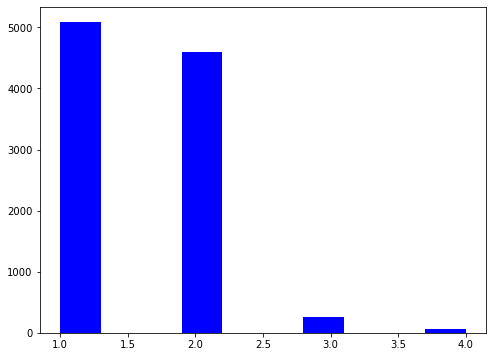

In [195]:
NumOfProducts_count=df['NumOfProducts'].value_counts()
print(NumOfProducts_count)

plt.figure(figsize=(8,6))
plt.hist(df['NumOfProducts'],facecolor='b')
plt.show()

Now lets see how **NumOfProduct** is affecting our target variable **"Exited"**

In [16]:
df[['NumOfProducts', 'Exited']].groupby('Exited').mean()

,NumOfProducts
Exited,
0,1.544267
1,1.475209


**NumOfProduct**

1    5151
0    4849
Name: IsActiveMember, dtype: int64


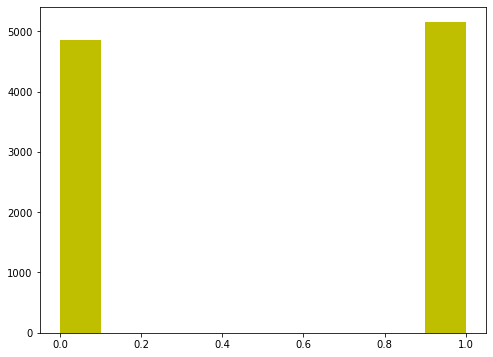

In [196]:
IsActiveMember_count=df['IsActiveMember'].value_counts()
print(IsActiveMember_count)

plt.figure(figsize=(8,6))
plt.hist(df['IsActiveMember'],facecolor='y')
plt.show()

Now lets see how **IsActiveMember** is affecting our target variable **"Exited"**

In [18]:
df[['IsActiveMember', 'Exited']].groupby('Exited').mean()

,IsActiveMember
Exited,
0,0.554565
1,0.360825


**EstimatedSalary**

24924.92     2
109145.20    1
59755.14     1
1557.82      1
117202.19    1
            ..
37674.47     1
158043.11    1
103792.53    1
182266.01    1
155061.97    1
Name: EstimatedSalary, Length: 9999, dtype: int64


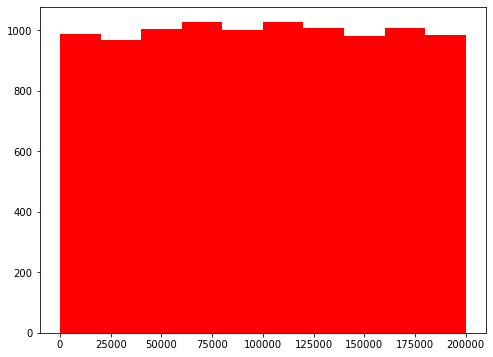

In [197]:
EstimatedSalary_count=df['EstimatedSalary'].value_counts()
print(EstimatedSalary_count)

plt.figure(figsize=(8,6))
plt.hist(df['EstimatedSalary'],facecolor='r')
plt.show()

Now lets see how **EstimatedSalary** is affecting our target variable **"Exited"**

In [20]:
df[['EstimatedSalary', 'Exited']].groupby('Exited').mean()

,EstimatedSalary
Exited,
0,99738.391772
1,101465.677531


**Observations**
1. Balance, numofproduct, IsactiveMember and estimated salary are not giving valuable insights related to our target variable in histograms and mean form.

# Bar Plots

**Importing the required library**

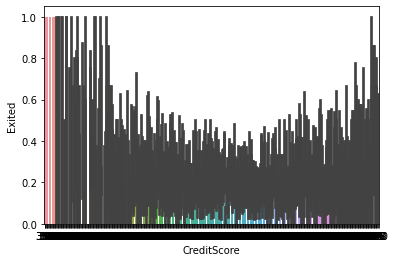

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

 
# class v / s fare barplot
sns.barplot(x = 'CreditScore', y = 'Exited', data = df)

 
# Show the plot
plt.show()

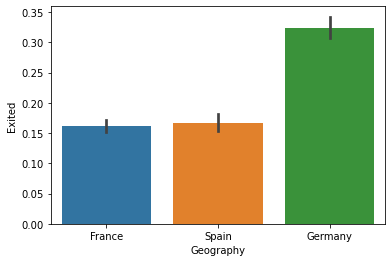

In [8]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

 
# class v / s fare barplot
sns.barplot(x = 'Geography', y = 'Exited', data = df)

 
# Show the plot
plt.show()

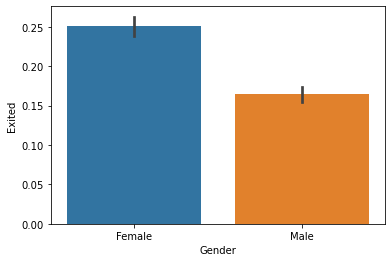

In [5]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

 
# class v / s fare barplot
sns.barplot(x = 'Gender', y = 'Exited', data = df)

 
# Show the plot
plt.show()

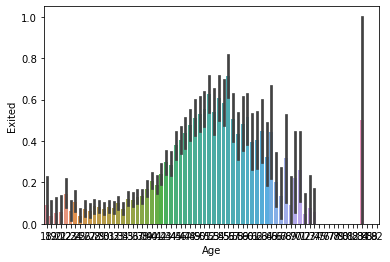

In [9]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

 
# class v / s fare barplot
sns.barplot(x = 'Age', y = 'Exited', data = df)

 
# Show the plot
plt.show()

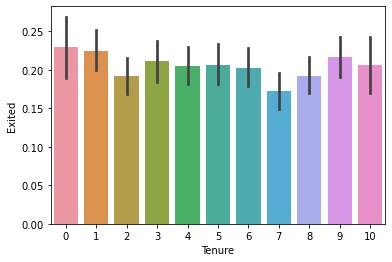

In [10]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

 
# class v / s fare barplot
sns.barplot(x = 'Tenure', y = 'Exited', data = df)

 
# Show the plot
plt.show()

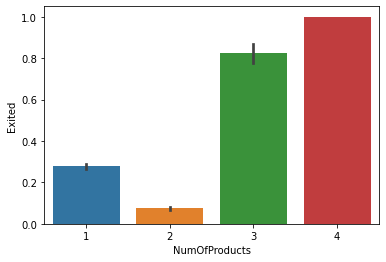

In [3]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

 
# class v / s fare barplot
sns.barplot(x = 'NumOfProducts', y = 'Exited', data = df)

 
# Show the plot
plt.show()

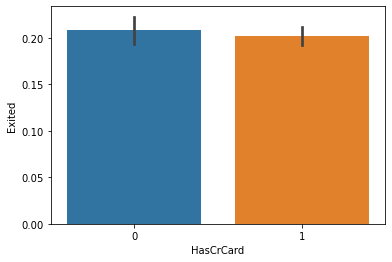

In [3]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

 
# class v / s fare barplot
sns.barplot(x = 'HasCrCard', y = 'Exited', data = df)

 
# Show the plot
plt.show()

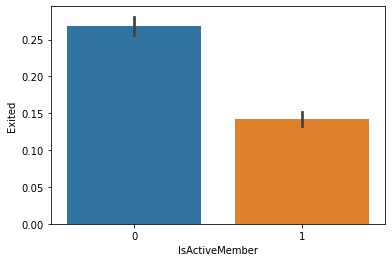

In [4]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt

 
# class v / s fare barplot
sns.barplot(x = 'IsActiveMember', y = 'Exited', data = df)

 
# Show the plot
plt.show()

# Pdf/Cdf

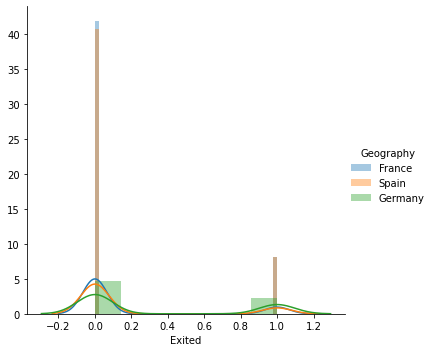

In [6]:
sns.FacetGrid(df, hue="Geography", size=5) \
   .map(sns.distplot, "Exited") \
   .add_legend();
plt.show();

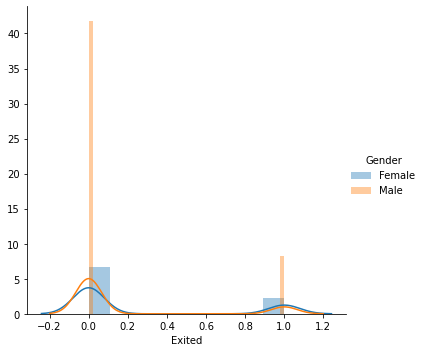

In [8]:
sns.FacetGrid(df, hue="Gender", size=5) \
   .map(sns.distplot, "Exited") \
   .add_legend();
plt.show();

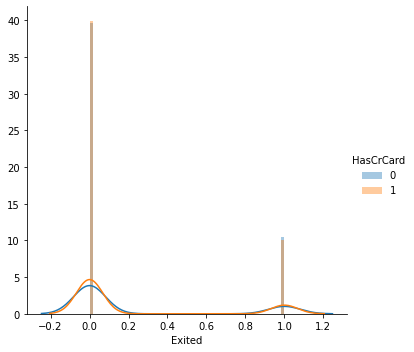

In [10]:
sns.FacetGrid(df, hue="HasCrCard", size=5) \
   .map(sns.distplot, "Exited") \
   .add_legend();
plt.show();

**CDF**

[0.7963 0.     0.     0.     0.     0.     0.     0.     0.     0.2037]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


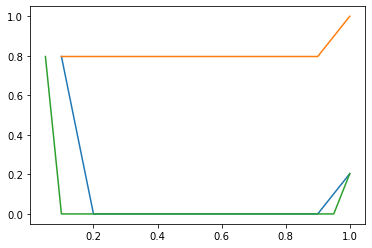

In [11]:
counts, bin_edges = np.histogram(df['Exited'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df['Exited'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

# Box Plots/Violin Plots

Text(18.029461805555556, 0.5, 'Estimated Salary')

<Figure size 1440x1440 with 0 Axes>

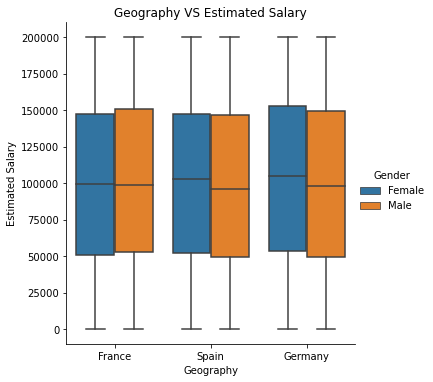

In [29]:

# Looking at Geography and Gender Distribution against Estimated Salary
plt.figure(figsize=(20,20))
sns.catplot(x="Geography", y="EstimatedSalary", hue="Gender", kind="box", data=df)
plt.title("Geography VS Estimated Salary")
plt.xlabel("Geography")
plt.ylabel("Estimated Salary")


5.0128
5.0
8.0
3.0
7.0


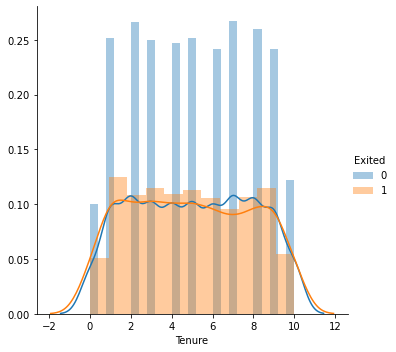

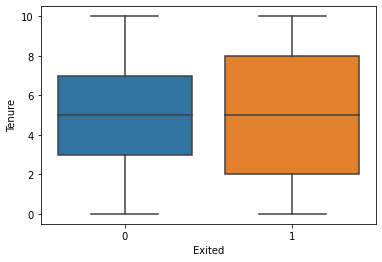

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

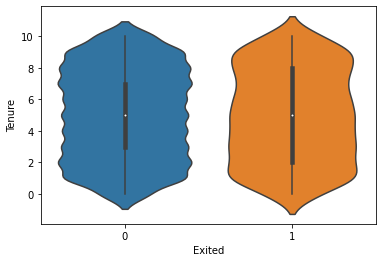

In [14]:
a=np.mean(df.Tenure)
print(a)
b=np.median(df.Tenure)
print(b)

sa=df.loc[df['Exited']==1]
sb=df.loc[df['Exited']==0]

c=np.percentile(sa['Tenure'],75)
print(c)

d=np.percentile(sb['Tenure'],25)
print(d)

e=np.percentile(sb['Tenure'],75)
print(e)

sns.FacetGrid(df, hue="Exited", size=5) \
   .map(sns.distplot, "Tenure",kde='True') \
   .add_legend()
plt.show()
sns.boxplot(x='Exited',y='Tenure', data=df)
plt.show()

sns.violinplot(x='Exited',y='Tenure', data=df)

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Observations**

When we look at the statistical insights, we see that the average age of our customers is 39, the average month customer has been a member is 5 and the estimated average salary is 100K.

When we look at the gender and geographic distribution of estimated salary, we see that male customer estimated average salary is higher than females in France and Spain, however in Germany female customers’ estimated average salary is higher.

From above analysis of data, now we can come to a result that we have to to create a new dataframe where we will eliminate all the irrelevant features.

In [23]:
final_df=df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

# Bivariate Analysis

# Scatter Plot and Pair Plot

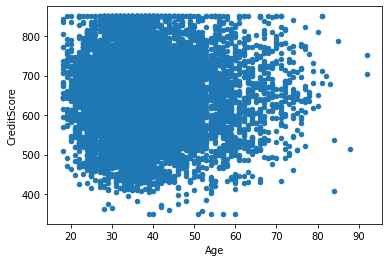

In [23]:
final_df.plot(kind='scatter', x='Age', y='CreditScore') ;

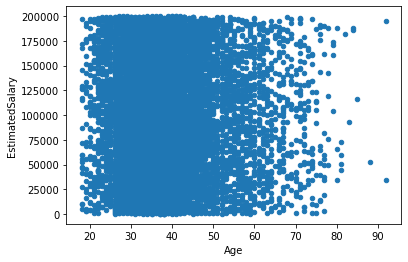

In [30]:
final_df.plot(kind='scatter', x='Age', y='EstimatedSalary') ;

When we look at the relationship between age and credit score, the linear relationship is very weak in order to clearly define correlation.

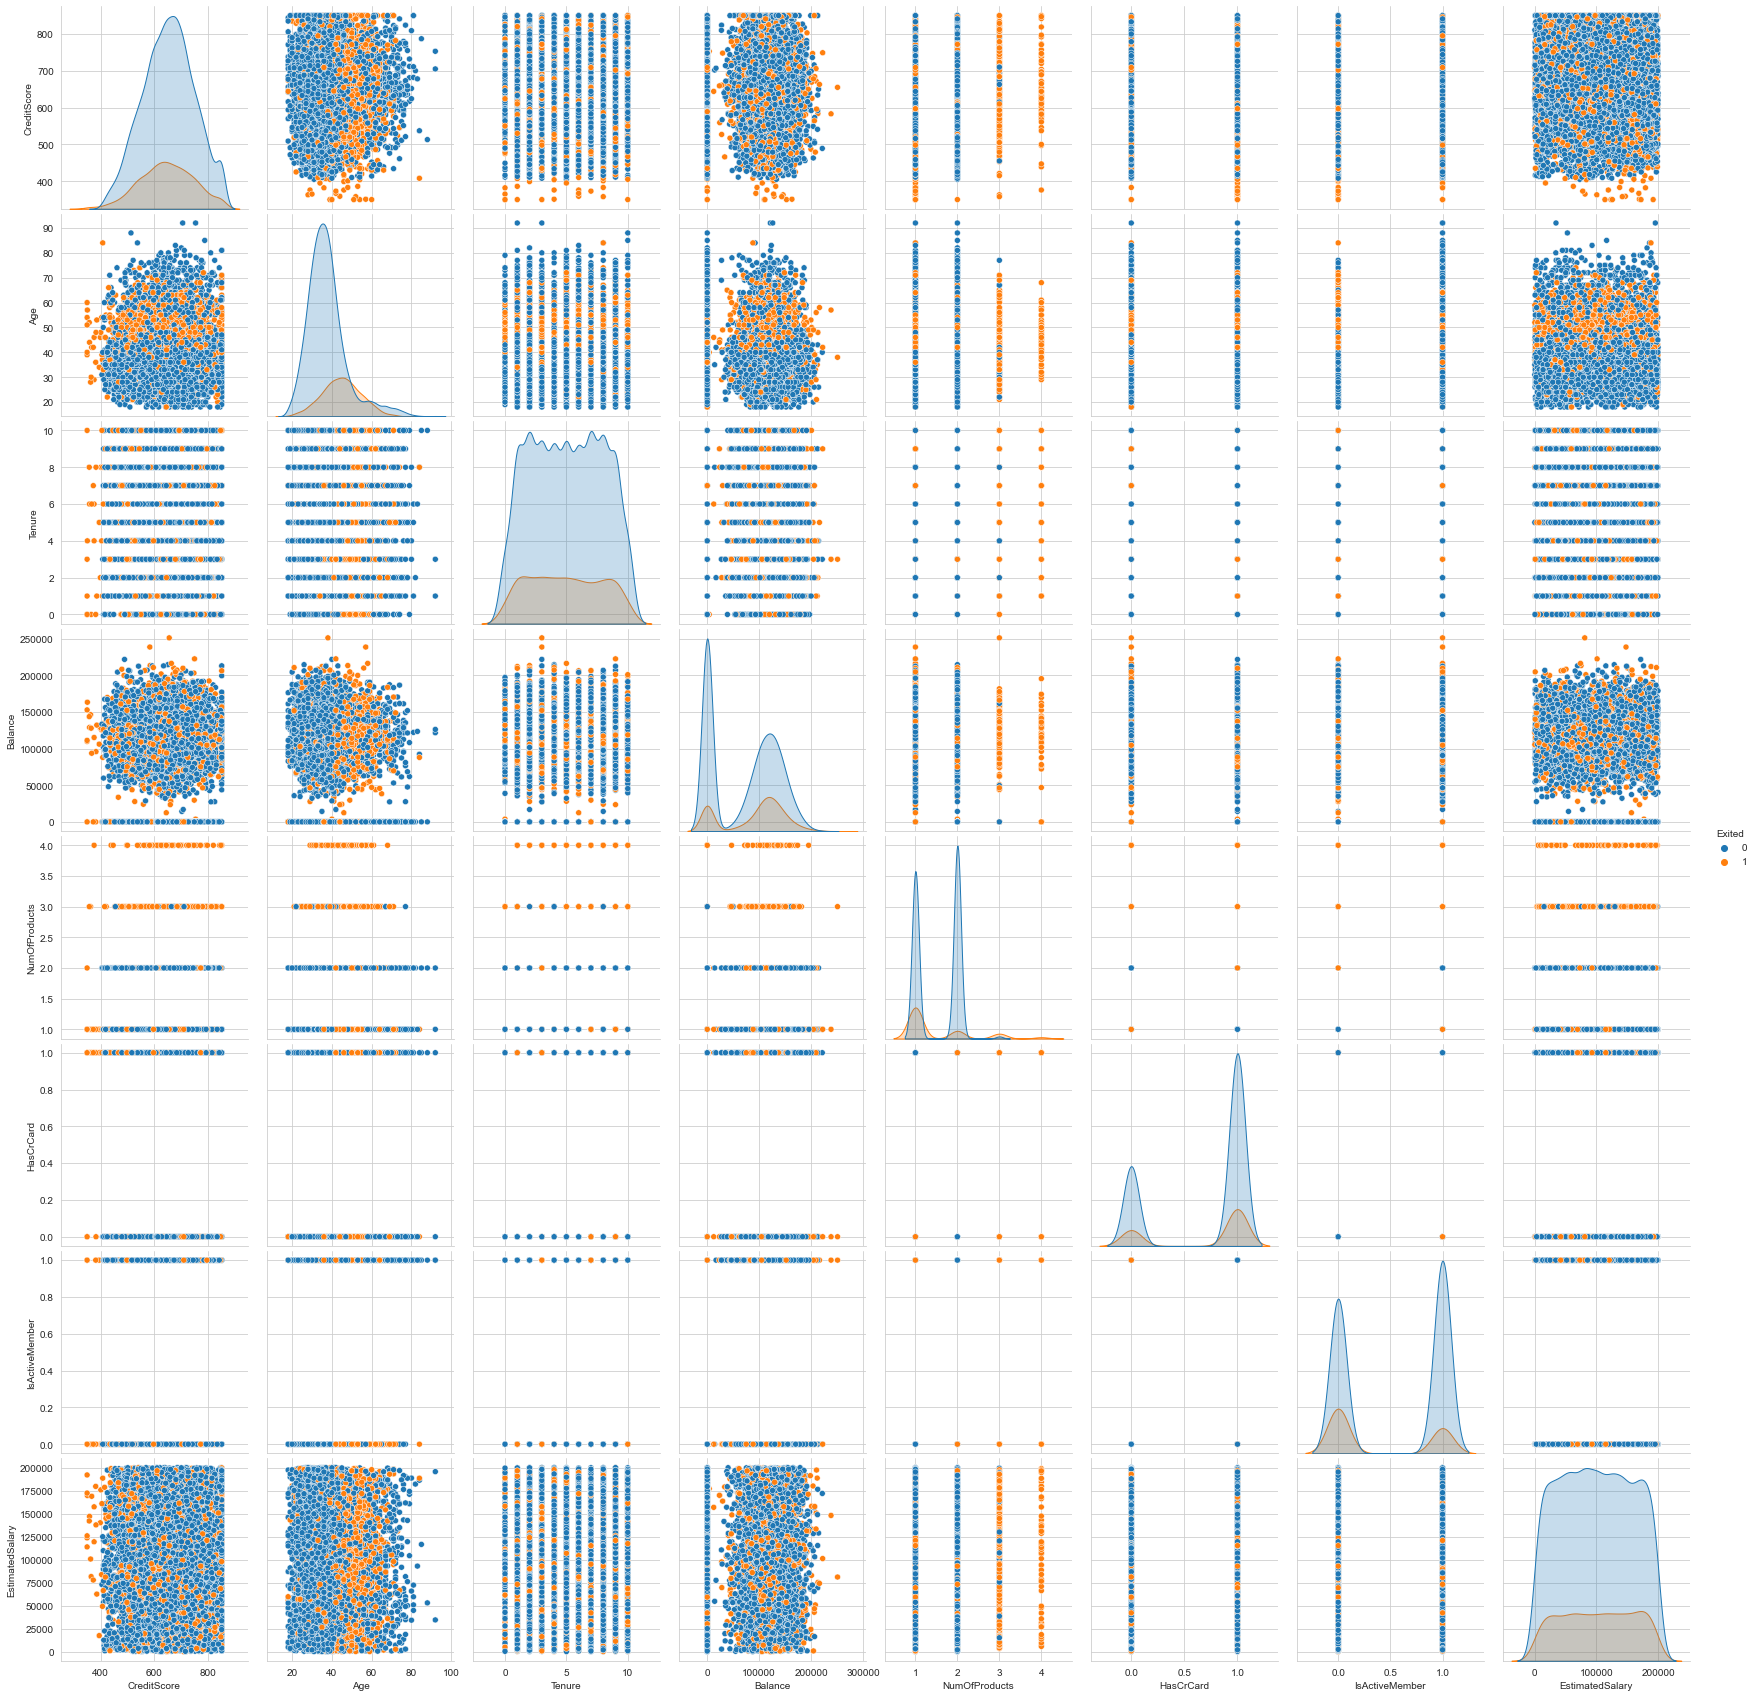

In [31]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(final_df, hue="Exited", size=3);
plt.show()

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

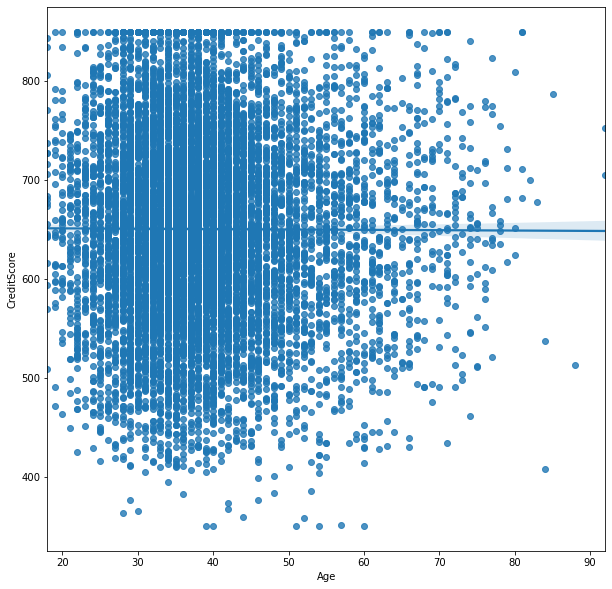

In [30]:
# Looking at linear relationship between Age and CreditScore
plt.figure(figsize=(10,10))
sns.regplot(x="Age", y="CreditScore", data=final_df)

<AxesSubplot:>

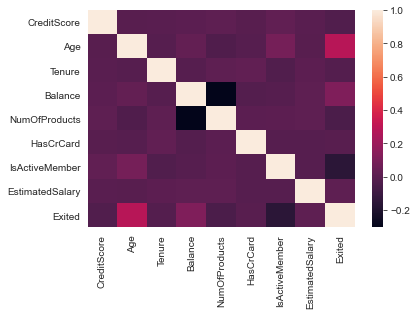

In [32]:
corrmat = final_df.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn')
sns.heatmap(corrmat, 
        xticklabels=corrmat.columns,
        yticklabels=corrmat.columns)

Text(0.5, 1.0, 'Correlation Heatmap')

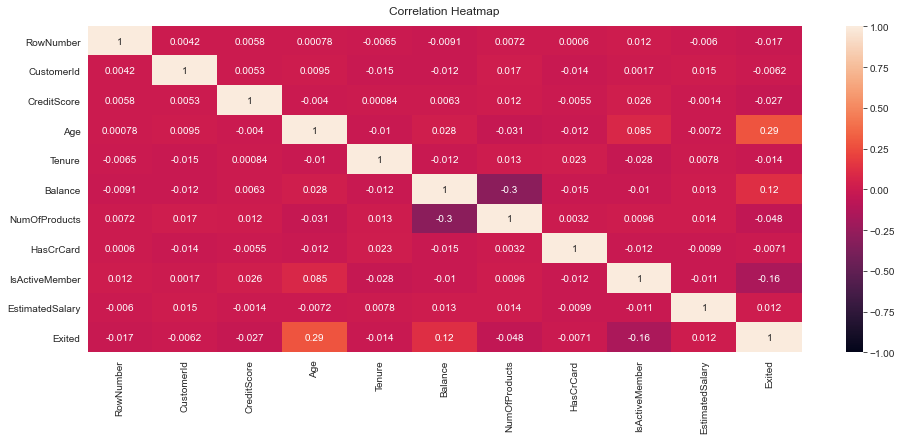

In [33]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin = -1, vmax= 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [198]:
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Data Pre-Processing

Here we will do the data pre-processing of our final data frame which we created earlier,

we will convert all the categorical features into numerical features for further evaluation so that we can apply machine-learning algorithms in it and find which algorithm works best for our data frame.

In [183]:
final_df=df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

Converting all the categorical features into numerical features

In [184]:
final_df = pd.get_dummies(final_df, drop_first = True)
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Selecting and Preparing the Feature Set and Target

In [185]:
x = final_df.iloc[:,[0,1,2,3,4,5,6,7,9,10,11]]
y = final_df.iloc[:,8].values

In [89]:
x.describe

<bound method NDFrame.describe of       CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.8

In [45]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

# Model Training

**split train and test data**

In [135]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [158]:
print(x_train)

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]


In [162]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [163]:
print(model.feature_importances_)

[0.11953336 0.23534943 0.10429181 0.13002072 0.14359595 0.03160486
 0.04448064 0.11858085 0.02882048 0.02130801 0.02241388]


In [164]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [165]:
y_pred = rf.predict(x_test)

In [166]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[1532   66]
 [ 222  180]]
0.856


In [128]:
#upsampling of data

no_churn=X[X['Exited']==0]
yes_churn=X[X['Exited']==1]
upsampled = yes_churn.sample(n=len(no_churn), replace=True)
X1 = no_churn.append(upsampled).reset_index(drop=True)
print(upsampled.shape)
X1.shape

X1.head()

(7963, 10547)


,RowNumber,CustomerId,Surname,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,CreditScore_351,CreditScore_358,...,EstimatedSalary_199805.63,EstimatedSalary_199808.1,EstimatedSalary_199841.32,EstimatedSalary_199857.47,EstimatedSalary_199862.75,EstimatedSalary_199909.32,EstimatedSalary_199929.17,EstimatedSalary_199953.33,EstimatedSalary_199970.74,EstimatedSalary_199992.48
0,2,15647311,Hill,83807.86,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,15701354,Boni,0.00,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,15737888,Mitchell,125510.82,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,15592531,Bartlett,0.00,2,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,15792365,He,142051.07,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KNN- K-Nearest Neighbour

**Assumption**
we know that KNN works on the assumption that the nearest neighbour belongs to the same class.


we will take values of K and seperate training data and testing data and perform the further operation and by using f1 score we will conclude whether KNN gives satisfactory results on our model or not.

In [149]:
# knn(k nearest neighbour)
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier

tuned_parameters=[{'n_neighbors':[3,4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)
clf= KNeighborsClassifier()
modelknn=GridSearchCV( clf,tuned_parameters,scoring='f1_weighted')

modelknn.fit(X_train,y_train)

print(modelknn.best_estimator_)
print(modelknn.score(X_test,y_test))
# Fit the classifier to the data

KNeighborsClassifier(n_neighbors=4)
0.7197381748788138


In [150]:
knn_test_prediction=modelknn.predict(x_test)
knn_train_predictions=modelknn.predict(x_train)

In [159]:
#evaluation
from sklearn.metrics import f1_score
x_knntest_F1score=f1_score(y_test,knn_test_prediction,average='weighted')
print("Testing f1 score is",x_knntest_F1score) #f1 score on test data

x_knntrain_F1score=f1_score(y_train,knn_train_predictions,average='weighted')
print("Training f1 score is",x_knntrain_F1score) #f1 score on train data

Testing f1 score is 0.7483767883697872
Training f1 score is 0.7417346920564296


**Observation**

KNN is giving us F1 score of 74%
we will try another algorithm.

# Logistic regression

In [160]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

tuned_parameters=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=50)

model=GridSearchCV(LogisticRegression(),tuned_parameters,scoring='f1_weighted')

model.fit(x_train,y_train)

print(model.best_estimator_)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

LogisticRegression(C=0.01)
0.7243146238925522
0.7212225209384425


**Observation**

Logistic Regression is giving us F1 score of 72%,
which is less than KNN so definitely, we wont use logistic regression in this problem.
we will try another algorithm.

# SVM

In [171]:
#svm(support vector machine)
from sklearn import svm
tuned_parameters=[{'n_neighbors':[3,4,5,6]}]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)
tuned_parameters=[{'C':[0.001, 0.01, 0.1, 1, 10]}]
clf= svm.SVC(kernel='rbf')
smodel=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted',cv=3)

smodel.fit(X_train,y_train)

print(smodel.best_estimator_)
print(smodel.score(X_test,y_test))
# Fit the classifier to the data

SVC(C=0.001)
0.711572054557798


In [172]:
svm_test_prediction=smodel.predict(X_test)
svm_train_predictions=smodel.predict(X_train)


In [173]:
#evaluation
from sklearn.metrics import f1_score
X_svmtest_F1score=f1_score(y_test,svm_test_prediction,average='weighted')
print("Testing f1 score is",X_svmtest_F1score) #f1 score on test data

X_svmtrain_F1score=f1_score(y_train,svm_train_predictions,average='weighted')
print("Training f1 score is",X_svmtrain_F1score) #f1 score on train data


Testing f1 score is 0.711572054557798
Training f1 score is 0.7036150749425706


**Observation**
We got accuracy of only 71% which is lower than KNN and logistic regression,

so it is clear that we cant use SVM for this problem.

lets try Decision tree and see whether F1 score improves or not

# Decision Tree

In [167]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[4,5,6]}]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)

model=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted')

model.fit(x_train,y_train)

print(model.best_estimator_)
print(model.score(x_test,y_test))
print(model.score(x_train,y_train))

DecisionTreeClassifier(max_depth=6, min_samples_split=5)
0.841919066925492
0.8500502602252757


In [168]:
clf = tree.DecisionTreeClassifier(min_samples_split=5,random_state=None)
tuned_parameters=[{'max_depth':[5,8,10]}]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=50)

model=GridSearchCV(clf,tuned_parameters,scoring='f1_weighted')

model.fit(x_train,y_train)

print(model.best_estimator_)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

DecisionTreeClassifier(max_depth=8, min_samples_split=5)
0.8779511275419825
0.8333506463651353


**Observation**

we can see that decision tree is giving much better results than KNN, logistic and SVM.

F1 score is also 83% which is pretty good for our model.

lets compare it with random forest and see whether it gives better results than decision tree or not.

# Random Forest

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import tree
clf1 = RandomForestClassifier()
tuned_parameters1=[{'n_estimators':[100,200,300]}]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state=50)

model=GridSearchCV(clf1,tuned_parameters1,scoring='f1_weighted')

model.fit(x_train,y_train)

print(model.best_estimator_)
print(model.score(x_test,y_test))

RandomForestClassifier(n_estimators=200)
0.8475640088344005


**Observation**


Random Forest is giving us approax 85% accuracy which highest among all the other algorithm.
so random forest is the most suitable algorithm for our customer churn dataset.

# Conclusion

 lets use pretty table library to conclude things in a better way

In [205]:
import prettytable
from prettytable import PrettyTable
columns=(["ALGORITHM", "F1_SCORE_WEIGHTED"])
myTable = PrettyTable()
myTable.add_column(columns[0], ["KNN","Logistic Regression","SVM","Decision Tree","Random Forest "])
myTable.add_column(columns[1], [" 74.83%"," 72%","71%", "83%", "85%"])

print(myTable)

+---------------------+-------------------+
|      ALGORITHM      | F1_SCORE_WEIGHTED |
+---------------------+-------------------+
|         KNN         |       74.83%      |
| Logistic Regression |         72%       |
|         SVM         |        71%        |
|    Decision Tree    |        83%        |
|    Random Forest    |        85%        |
+---------------------+-------------------+


Random Forest and Decision Tree are very close in terms of F1_Score, but random forest is an ensembling technique which consists of:

    
**Decision Tree as Base model+ row sampling+ column Sampling+ Aggregation**


It is giving us f1 score of 85% so we will consider it.

# Thank you
By Mufaddal Pathan